In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train.csv')
test = pd.read_csv(filepath_home+'test_x.csv')

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [4]:
tp_cols = ['tp'+'0'*(2-len(str(i)))+str(i) for i in range(1,11)]
tp_data = data[tp_cols].copy()

In [5]:
tp_data['all_filled'] = tp_data.apply(lambda x: 1 if 7 not in x.values else 0 , axis=1) 

In [6]:
tp_data.all_filled.sum()

55803

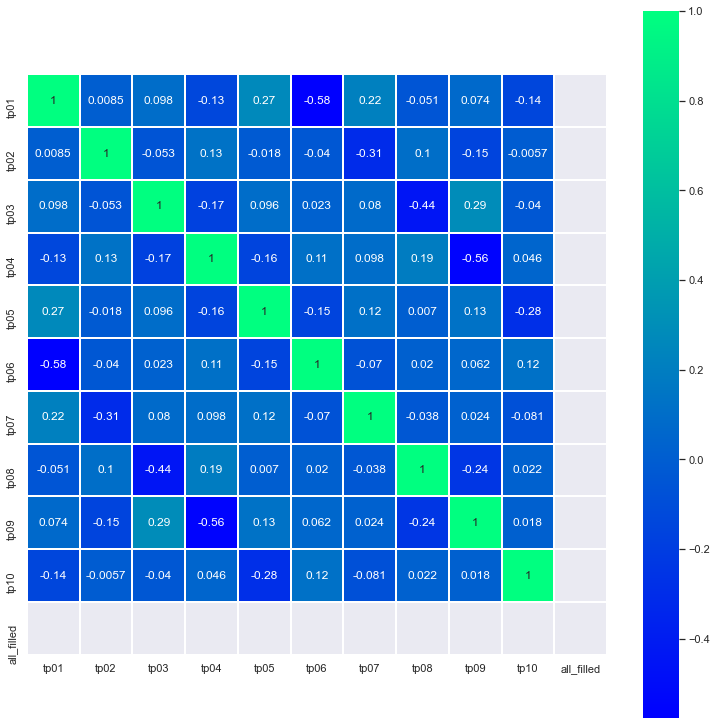

In [7]:
corr = tp_data[tp_data.all_filled==1].corr(method='spearman')
low = corr.min().min()
high = corr.max().max()
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='winter',
           annot=True,
           linewidths=1)

### 질문이 2개씩 묶여 서로 유의미한 상관관계를 보임

In [8]:
tp_data[['tp02','tp04','tp06','tp08','tp10']]= 6-tp_data[['tp02','tp04','tp06','tp08','tp10']]

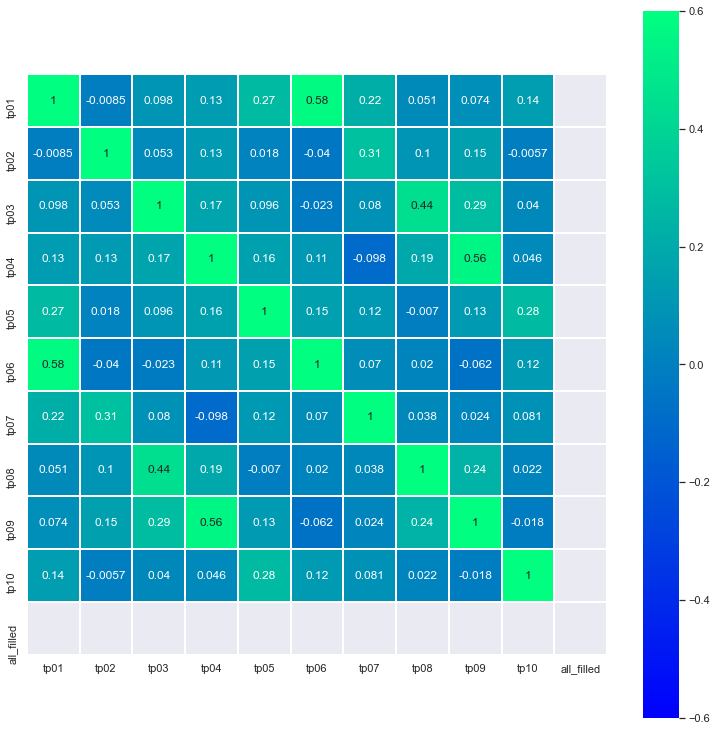

In [9]:
corr = tp_data[tp_data.all_filled==1].corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=-0.6,
            vmax=0.6,
            cmap='winter',
           annot=True,
           linewidths=1)

In [10]:
tp_data['Extraversion']=(tp_data.tp01+tp_data.tp06)/2
tp_data['Agreeableness']=(tp_data.tp02+tp_data.tp07)/2
tp_data['Conscientiousness']=(tp_data.tp03+tp_data.tp08)/2
tp_data['Emotional Stability']=(tp_data.tp04+tp_data.tp09)/2
tp_data['Openness to Experiences']=(tp_data.tp05+tp_data.tp10)/2

In [12]:
big_five_personality = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']

for col in big_five_personality:
    tp_data[col] = np.where(tp_data[col]>tp_data[col].mean(),1,0)

In [ ]:
data = data.join(tp_data[big_five_personality])

In [18]:
sample = tp_data[big_five_personality][:split_point].join(train['voted'])

In [21]:
sample.groupby(big_five_personality)['voted'].mean().unstack()

Openness to Experiences                                                  0  \
Extraversion Agreeableness Conscientiousness Emotional Stability             
0            0             0                 0                    1.433415   
                                             1                    1.511704   
                           1                 0                    1.510095   
                                             1                    1.583429   
             1             0                 0                    1.498239   
                                             1                    1.526701   
                           1                 0                    1.585479   
                                             1                    1.597574   
1            0             0                 0                    1.467386   
                                             1                    1.545263   
                           1                 0                    1.535310   
                                             1                    1.579428   
             1             0                 0                    1.535733   
                                             1                    1.561762   
                           1                 0                    1.619385   
                                             1                    1.645401   

Openness to Experiences                                                  1  
Extraversion Agreeableness Conscientiousness Emotional Stability            
0            0             0                 0                    1.454792  
                                             1                    1.504261  
                           1                 0                    1.549393  
                                             1                    1.600571  
             1             0                 0                    1.524378  
                                             1                    1.510471  
                           1                 0                    1.609375  
                                             1                    1.633188  
1            0             0                 0                    1.477755  
                                             1                    1.545375  
                           1                 0                    1.530151  
                                             1                    1.618557  
             1             0                 0                    1.539765  
                                             1                    1.582494  
                           1                 0                    1.649474  
                                             1                    1.655265

In [25]:
from sklearn.model_selection import train_test_split
x = sample.drop(['voted'],axis=1)
y = sample.voted

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.5597821312483529

In [26]:
train.groupby(['married'])['voted'].mean()

married
0    1.677419
1    1.629572
2    1.333433
3    1.422454
Name: voted, dtype: float64

In [27]:
train.groupby(['race'])['voted'].mean()

race
Arab                     1.709402
Asian                    1.704565
Black                    1.597786
Indigenous Australian    1.547170
Native American          1.587591
Other                    1.622402
White                    1.495776
Name: voted, dtype: float64

In [28]:
train.groupby(['religion'])['voted'].mean()

religion
Agnostic                1.542602
Atheist                 1.572704
Buddhist                1.621176
Christian_Catholic      1.526512
Christian_Mormon        1.619159
Christian_Other         1.539615
Christian_Protestant    1.434667
Hindu                   1.613016
Jewish                  1.449692
Muslim                  1.687081
Other                   1.582809
Sikh                    1.641026
Name: voted, dtype: float64

In [29]:
train.groupby(['age_group'])['voted'].mean()

age_group
+70s    1.263830
10s     1.837214
20s     1.469671
30s     1.411179
40s     1.357949
50s     1.329872
60s     1.271357
Name: voted, dtype: float64

In [30]:
train.groupby(['engnat'])['voted'].mean()

engnat
0    1.623377
1    1.537397
2    1.571394
Name: voted, dtype: float64

In [31]:
train.groupby(['urban'])['voted'].mean()

urban
0    1.490683
1    1.492872
2    1.541545
3    1.580402
Name: voted, dtype: float64

In [32]:
train.groupby(['gender'])['voted'].mean()

gender
Female    1.539573
Male      1.553206
Name: voted, dtype: float64

In [33]:
train.groupby(['familysize'])['voted'].mean()

familysize
0             1.586689
1             1.575669
2             1.549894
3             1.543088
4             1.516609
5             1.518349
6             1.535800
7             1.480620
8             1.561086
9             1.523810
10            1.525424
11            1.435897
12            1.476190
13            1.363636
14            1.444444
15            1.375000
16            2.000000
17            1.000000
18            2.000000
20            2.000000
21            1.500000
30            1.000000
34            2.000000
44            1.666667
100           1.000000
999           1.000000
2147483647    2.000000
Name: voted, dtype: float64

In [34]:
train.groupby(['education'])['voted'].mean()

education
0    1.522727
1    1.950275
2    1.632967
3    1.403494
4    1.380316
Name: voted, dtype: float64

In [35]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]

In [43]:
train['mach_score'] = train.apply(lambda x:np.round(x.iloc[1:41:2].mean()),axis=1)

In [44]:
train.mach_score.head()

0    3.0
1    3.0
2    2.0
3    3.0
4    3.0
Name: mach_score, dtype: float64

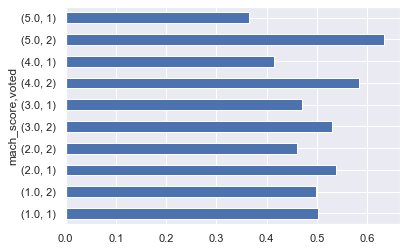

In [52]:
train.groupby(['mach_score'])['voted'].value_counts(normalize=True).plot(kind='barh')

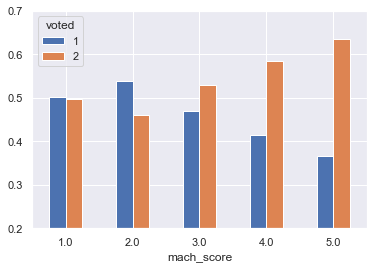

In [68]:
train.groupby(['mach_score'])['voted'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                                                  rot=0,
                                                                                  ylim=(0.2,0.7))

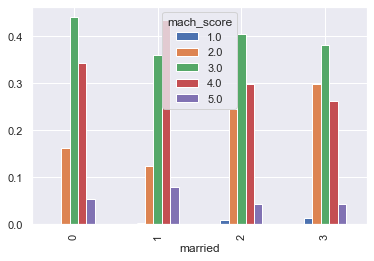

In [60]:
train.groupby(['married'])['mach_score'].value_counts(normalize=True).unstack().plot(kind='bar')

In [ ]:
train = train.join()